Temps PIC Gauche :3.1094104308390023
Temps PIC Droit :2.793764172335601
Delta : 0.31564625850340144
Vitesse : 1.5840517241379306 m/s


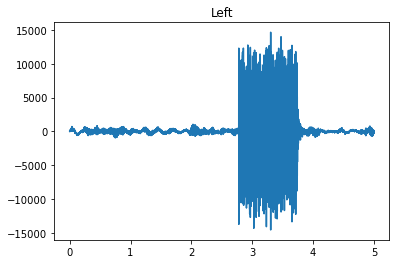

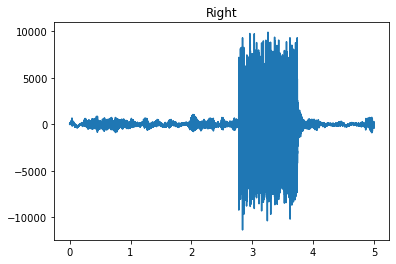

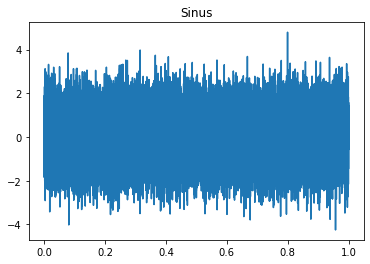

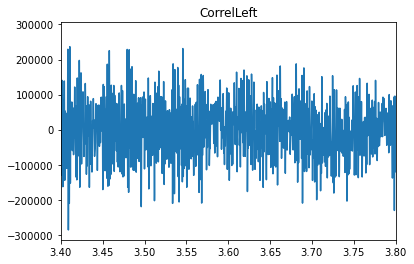

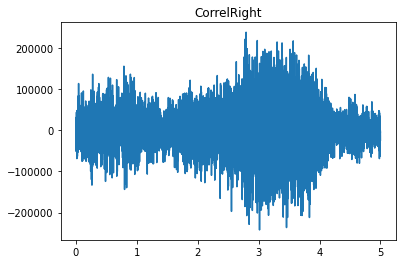

In [215]:
import numpy as np
import scipy.io.wavfile
import scipy as sp
import scipy.signal
import matplotlib.pyplot as plt

# SigNal M
rate, data = scipy.io.wavfile.read('enregistrement.wav')
fs=44100
N=len(data) #nombre d'échantillions 
n = np.arange(0,N)/44100 

data_right = data[:,1]
data_left = data[:,0]

distance=0.5


plt.figure()
plt.title("Left")
#plt.xlim(1,1.1)
plt.plot(n,data_left)
#signal X
plt.figure()
plt.title("Right")
plt.plot(n,data_right)
#signal X
t=np.arange(0,1,1/44100)
f=440
w=np.random.normal(0, 1, int(fs))
#w=np.sin(2*np.pi*f*t+np.pi/3)
#w=np.where(((t>=0.5) & (t<=1)),4000, 0)
plt.figure("Sinus")
plt.title("Sinus")
plt.plot(t,w)


fs=44100

fc = 1000 # fréquence de coupure du filtre passe-bas
b, a = sp.signal.butter(4, fc / (fs / 2), 'low')
data_left_filtered = sp.signal.filtfilt(b, a, data_left)
data_right_filtered = sp.signal.filtfilt(b, a, data_right)


corrLeft=np.correlate(data_left_filtered,w, mode='same')
corrRight=np.correlate(data_right_filtered,w, mode='same')
# Calcul de la corrélation croisée entre les deux signaux

plt.figure()
plt.title("CorrelLeft")
plt.xlim(3.4,3.8)
plt.plot(n,corrLeft)
#signal X
plt.figure()
plt.title("CorrelRight")
#plt.xlim(3,3.01)
plt.plot(n,corrRight)
#signal X

dt = 1/44100
fs = 44100

# indicesL = np.where(np.abs(corrLeft) > 20000)[0]
# indicesR = np.where(np.abs(corrRight) > 20000)[0]

# Trouver l'indice du maximum de la corrélation
max_index_Left = np.argmax(corrLeft)/fs
max_index_Right = np.argmax(corrRight)/fs

# max_index_Left = indicesL[0]/fs
# max_index_Right = indicesR[0]/fs

delta_t = delta = np.abs(max_index_Left - max_index_Right)

print("Temps PIC Gauche :"+str(max_index_Left))
print("Temps PIC Droit :"+str(max_index_Right))

print("Delta : "+str(delta_t))
print("Vitesse : "+str(distance/delta_t)+" m/s")